In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("GVF.csv",sep=';',encoding='cp1252')
df

,Unnamed: 0,artists,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,track_href
0,0,Greta Van Fleet,Safari Song,0.17600,0.373,0.931,0.000009,0.3190,-4.043,1,0.0506,175.920,0.740,https://api.spotify.com/v1/tracks/1BfR5GMOgW0p...
1,1,Greta Van Fleet,Edge Of Darkness,0.00717,0.452,0.944,0.161000,0.0766,-3.785,1,0.0587,148.070,0.673,https://api.spotify.com/v1/tracks/4rhUBIlzi7zg...
2,2,Greta Van Fleet,Flower Power,0.34900,0.198,0.703,0.038200,0.1510,-5.484,1,0.0361,76.899,0.219,https://api.spotify.com/v1/tracks/4SE1kjgRulcw...
3,3,Greta Van Fleet,A Change Is Gonna Come,0.02600,0.365,0.684,0.000329,0.1440,-4.769,0,0.0397,129.637,0.548,https://api.spotify.com/v1/tracks/12YYFvwwuYiw...
4,4,Greta Van Fleet,Highway Tune,0.01070,0.579,0.957,0.158000,0.2630,-2.940,1,0.0521,123.993,0.515,https://api.spotify.com/v1/tracks/7aOor99o8NNL...
5,5,Greta Van Fleet,Meet On The Ledge,0.30300,0.503,0.780,0.000024,0.1520,-4.751,1,0.0401,145.127,0.382,https://api.spotify.com/v1/tracks/6CDYbIZs6Djy...
6,6,Greta Van Fleet,Talk On The Street,0.23200,0.527,0.939,0.000411,0.1040,-3.518,0,0.0578,134.010,0.570,https://api.spotify.com/v1/tracks/2H9sGMEd19c2...
7,7,Greta Van Fleet,Black Smoke Rising,0.18700,0.372,0.911,0.000199,0.0883,-3.949,1,0.0694,200.012,0.536,https://api.spotify.com/v1/tracks/32BEasyNQgqX...


In [2]:
x = df.drop(["Unnamed: 0","track_href","artists","name"], axis = 1) #Drop nonvalue columns to create dataset
x

,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,0.17600,0.373,0.931,0.000009,0.3190,-4.043,1,0.0506,175.920,0.740
1,0.00717,0.452,0.944,0.161000,0.0766,-3.785,1,0.0587,148.070,0.673
2,0.34900,0.198,0.703,0.038200,0.1510,-5.484,1,0.0361,76.899,0.219
3,0.02600,0.365,0.684,0.000329,0.1440,-4.769,0,0.0397,129.637,0.548
4,0.01070,0.579,0.957,0.158000,0.2630,-2.940,1,0.0521,123.993,0.515
5,0.30300,0.503,0.780,0.000024,0.1520,-4.751,1,0.0401,145.127,0.382
6,0.23200,0.527,0.939,0.000411,0.1040,-3.518,0,0.0578,134.010,0.570
7,0.18700,0.372,0.911,0.000199,0.0883,-3.949,1,0.0694,200.012,0.536


In [3]:
x.danceability.mean()

0.42112499999999997

In [4]:
x.energy.mean()

0.856125

In [5]:
x.instrumentalness.mean()

0.044771565

In [6]:
x.liveness.mean()

0.1622375

In [7]:
x.speechiness.mean()

0.0505625

In [8]:
x.acousticness.mean()

0.16135875000000002

In [9]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(x) #t-sne algorithm to clusterly dimensionally reduce songs to (x,y) points

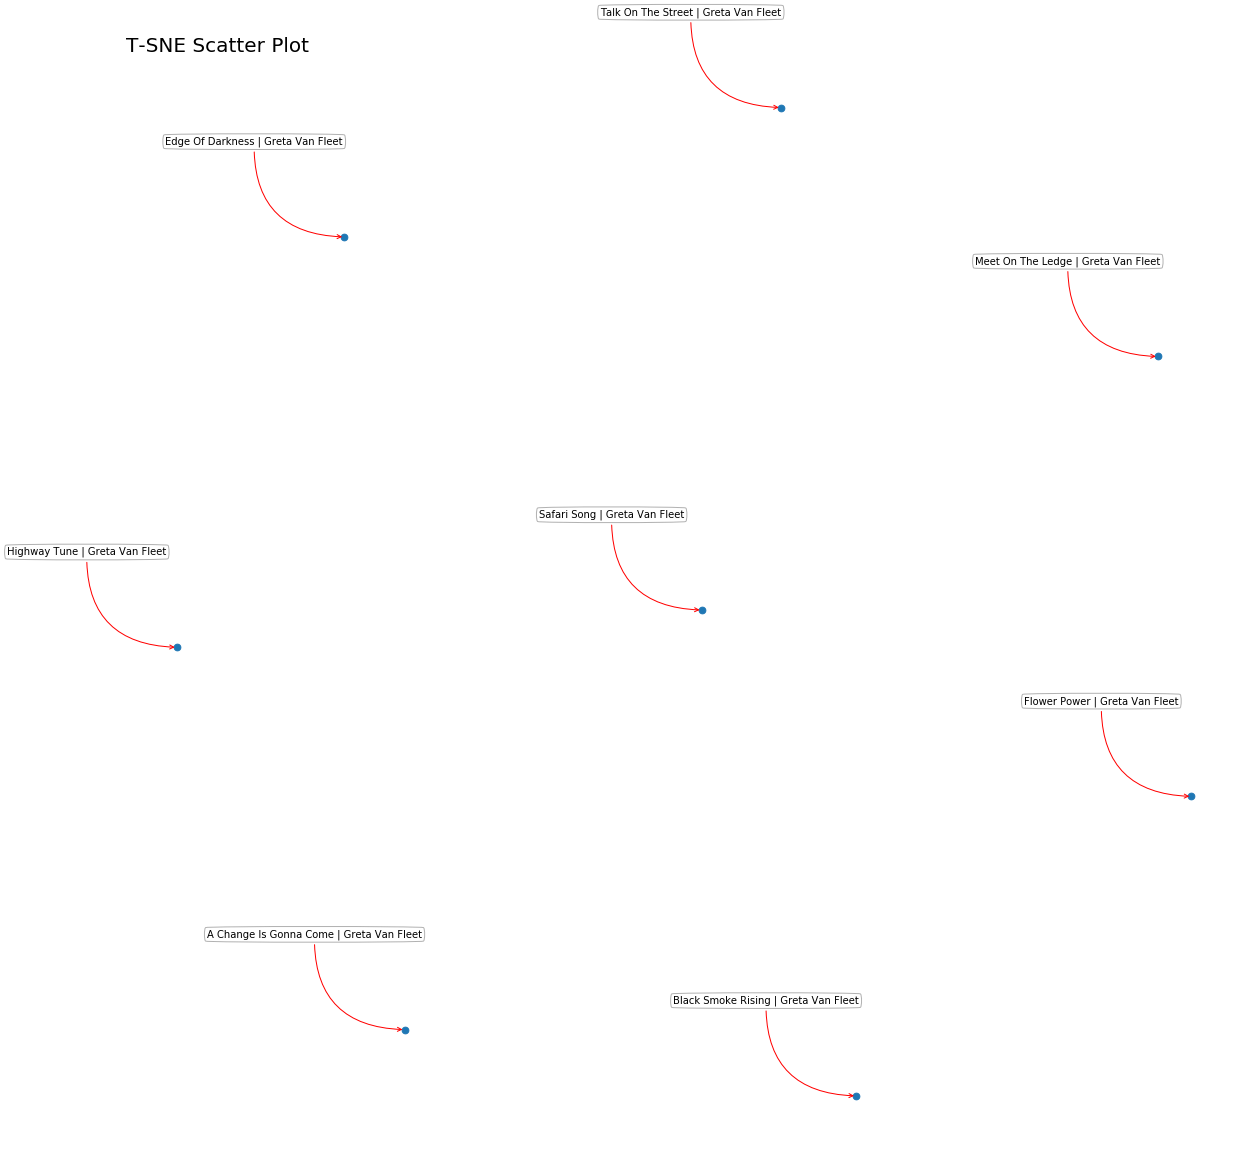

In [10]:
from matplotlib.pyplot import *
fig = figure(figsize=(20, 20))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=()) #remove axis labels
plt.title("T-SNE Scatter Plot", fontsize=20,loc='left')
scatter(X_embedded[:, 0], X_embedded[:, 1], s=45,   marker="o") #scatter plot of t-sne'd data

for row_id in range(0, len(df)):
        songpoint = df.name[row_id] + " | " + df.artists[row_id]
        xx = X_embedded[row_id, 0]
        yy = X_embedded[row_id, 1]
        plt.annotate(songpoint, (xx,yy), size=10, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))

In [11]:
x.corr()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
acousticness,1.000000,-0.404354,-0.339624,-0.613255,-0.084218,-0.578362,0.148907,-0.300103,-0.201259,-0.625706
danceability,-0.404354,1.000000,0.606834,0.352733,0.081341,0.788986,-0.127530,0.344340,0.243367,0.380668
energy,-0.339624,0.606834,1.000000,0.418552,0.161530,0.896296,0.239923,0.805175,0.532663,0.659998
instrumentalness,-0.613255,0.352733,0.418552,1.000000,0.038397,0.492858,0.380520,0.174344,-0.230542,0.138462
liveness,-0.084218,0.081341,0.161530,0.038397,1.000000,0.181796,0.275195,-0.274681,0.003840,0.215935
loudness,-0.578362,0.788986,0.896296,0.492858,0.181796,1.000000,-0.008687,0.704432,0.402944,0.625710
mode,0.148907,-0.127530,0.239923,0.380520,0.275195,-0.008687,1.000000,0.097985,0.167019,-0.137171
speechiness,-0.300103,0.344340,0.805175,0.174344,-0.274681,0.704432,0.097985,1.000000,0.719680,0.569774
tempo,-0.201259,0.243367,0.532663,-0.230542,0.003840,0.402944,0.167019,0.719680,1.000000,0.669658
valence,-0.625706,0.380668,0.659998,0.138462,0.215935,0.625710,-0.137171,0.569774,0.669658,1.000000


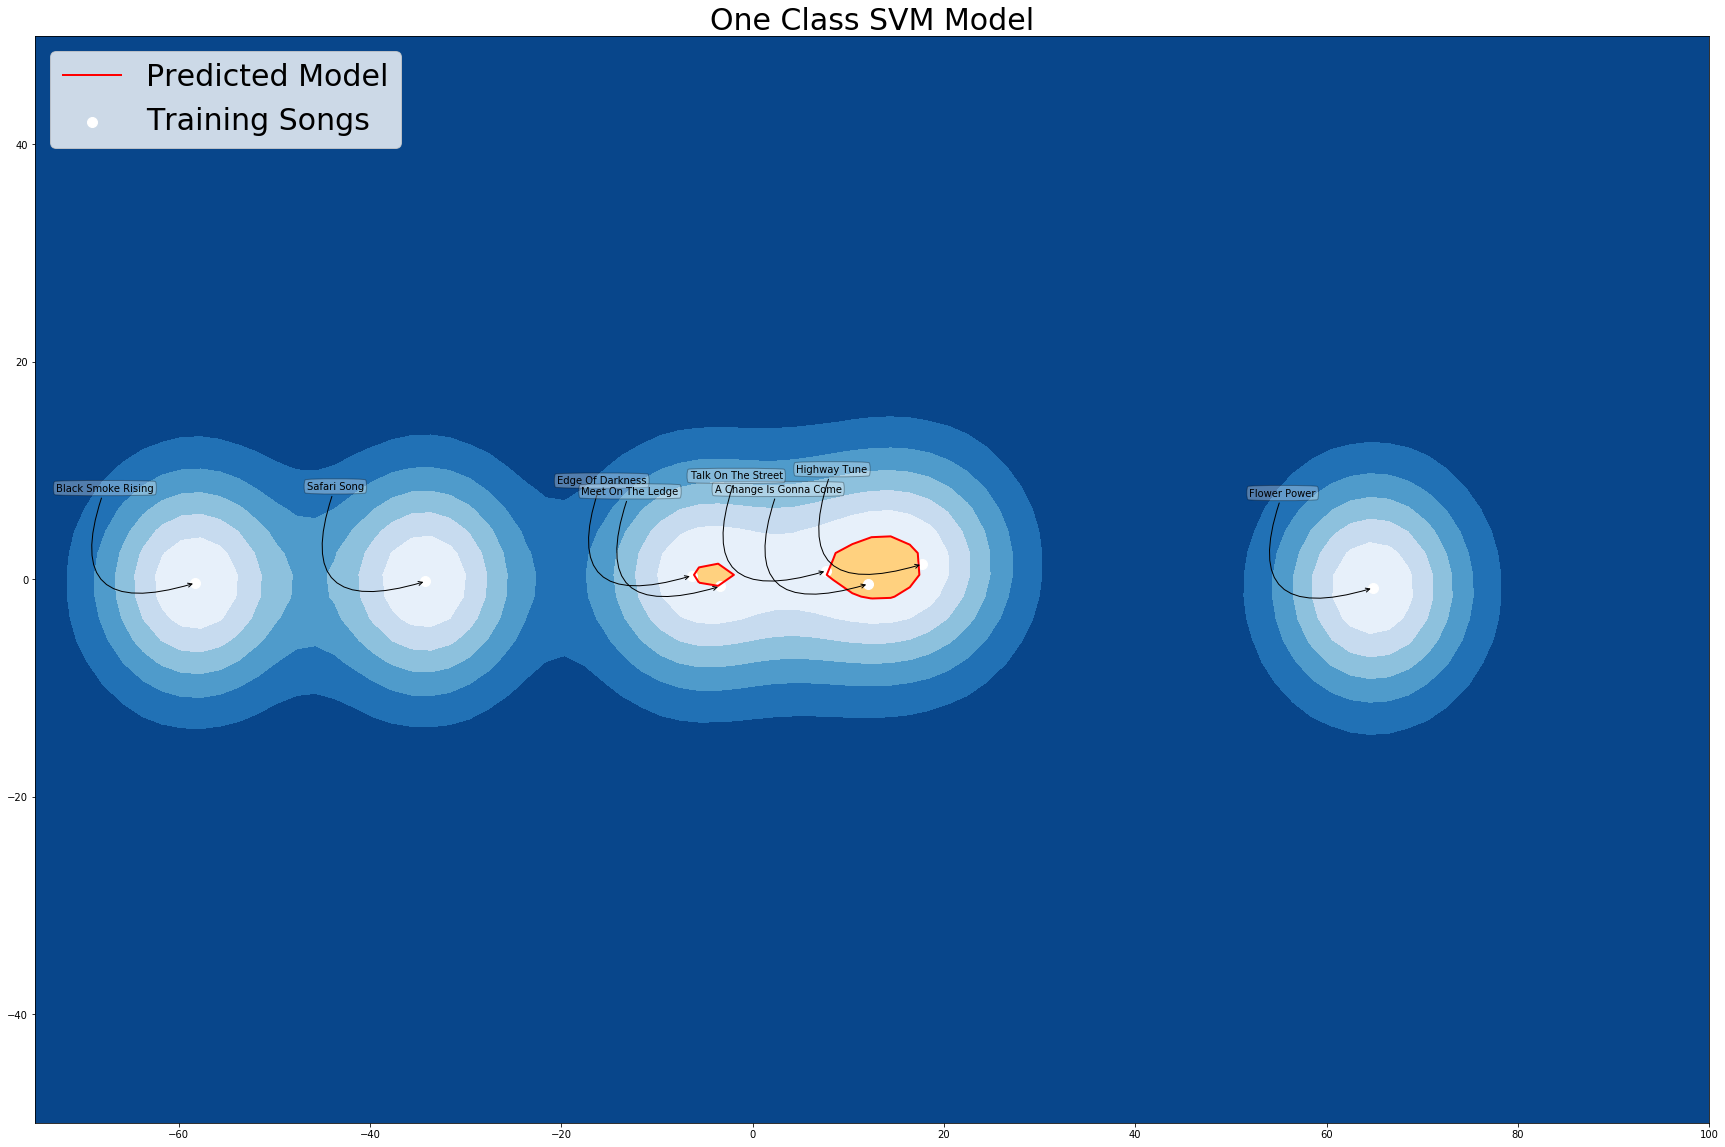

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.fit_transform(x) #PCA Dimension Reduction

from sklearn import svm #Novelty Detection Using SVM 
clf = svm.OneClassSVM(kernel="rbf", gamma=0.01) #Fit gamma to model size
clf.fit(x_pca)

xx, yy = np.meshgrid(np.linspace(-200, 800, 500), np.linspace(-200,800, 500)) #Gradient Shape to fit Classifier

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) #Decide which songs are classified as "artist" songs
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(30, 20),)
plt.title("One Class SVM Model", fontsize= 30)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r) #Contour Plot Background Based on Classifier
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange', alpha = 0.5) #Contour Plot Based on Classified Songs

#Plot song points back onto Contour Plot
for row_id in range(0, len(df)): 
        target_word = df.name[row_id]
        xxx = x_pca[row_id, 0]
        yyy = x_pca[row_id, 1]
        plt.annotate(target_word, (xxx,yyy), size=10, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=1', 
                            color='black'))


b1 = plt.scatter(x_pca[:, 0], x_pca[:, 1], c='white', s=100)
plt.axis('tight')
plt.xlim((-75, 100))
plt.ylim((-50, 50))

leg = plt.legend([a.collections[0], b1, ], #Make Legend
           ["Predicted Model", "Training Songs"],
           loc="upper left",prop={'size':30}, frameon=True)

plt.show()